In [43]:
!grep ">" aa_CPMosaicVirus.fasta


>aa_ORF5_Babaco
>aa_ORF5_Papaya
>aa_ORF5_Alternanthera
>aa_ORF5_Senna


In [44]:
!/Users/sebastianpenaherrera/Desktop/mafft-mac/mafft.bat --quiet "/Users/sebastianpenaherrera/Library/CloudStorage/OneDrive-Personal/DOC 2020_2022/1.- USFQ Microsoft/8.- SEMESTRE VIII/1.1.- Ingeneria Genetica LAB/Informe 1/aa_CPMosaicVirus.fasta" > "/Users/sebastianpenaherrera/Library/CloudStorage/OneDrive-Personal/DOC 2020_2022/1.- USFQ Microsoft/8.- SEMESTRE VIII/1.1.- Ingeneria Genetica LAB/Informe 1/aa_ali_CPMosaicVirus.fasta"

In [45]:
from Bio import SeqIO

In [46]:
!ls

Informe1.ipynb             aa_ali_CPMosaicVirus.fasta
aa_CPMosaicVirus.fasta


In [47]:
cp_aa = list(SeqIO.parse("/Users/sebastianpenaherrera/Library/CloudStorage/OneDrive-Personal/DOC 2020_2022/1.- USFQ Microsoft/8.- SEMESTRE VIII/1.1.- Ingeneria Genetica LAB/Informe 1/aa_ali_CPMosaicVirus.fasta","fasta"))

In [48]:
cp_aa

[SeqRecord(seq=Seq('MSGKSESSNTGNSPFPNLTKETMASFNFKPSSNLLPSEEELKIISTLLVAAKIP...SPE'), id='aa_ORF5_Babaco', name='aa_ORF5_Babaco', description='aa_ORF5_Babaco', dbxrefs=[]),
 SeqRecord(seq=Seq('MS--KSSMSTPNIAFPAITQEQMSSIKVDPTSNLLPSQEQLKSVSTLMVAAKVP...PPE'), id='aa_ORF5_Papaya', name='aa_ORF5_Papaya', description='aa_ORF5_Papaya', dbxrefs=[]),
 SeqRecord(seq=Seq('-------MSTP---FPQITQEQMNAFTPHATSNLLPSSEQLTTIASLLVAAKVP...PPE'), id='aa_ORF5_Alternanthera', name='aa_ORF5_Alternanthera', description='aa_ORF5_Alternanthera', dbxrefs=[]),
 SeqRecord(seq=Seq('------------MAFTAPTEEMMATFKPIPASNLLPTQEQLKTVTDLFRAAKVP...PPE'), id='aa_ORF5_Senna', name='aa_ORF5_Senna', description='aa_ORF5_Senna', dbxrefs=[])]

In [49]:
cp_aa_dic = {}
for cp in cp_aa:
    cp_aa_dic[cp.id]= cp

In [62]:
cp_aa_dic["aa_ORF5_Alternanthera"].seq

Seq('-------MSTP---FPQITQEQMNAFTPHATSNLLPSSEQLTTIASLLVAAKVP...PPE')

In [64]:
def get_aa_mutations(ini, var):
    cp_aa_dic = list(zip(ini, var))
    out =list()
    for pos,aa in enumerate(cp_aa_dic):
        if aa[0]!= aa[1]:
            out.append((aa[0] + str(pos) + aa[1]))
    return out

In [100]:
get_aa_mutations(cp_aa_dic["aa_ORF5_Babaco"].seq, cp_aa_dic["aa_ORF5_Papaya"].seq)

['G2-',
 'K3-',
 'S4K',
 'E5S',
 'S7M',
 'N8S',
 'G10P',
 'S12I',
 'P13A',
 'N16A',
 'L17I',
 'K19Q',
 'T21Q',
 'A23S',
 'F25I',
 'N26K',
 'F27V',
 'K28D',
 'S30T',
 'E37Q',
 'E39Q',
 'I42S',
 'I43V',
 'L47M',
 'I52V',
 'N54A',
 'T57V',
 'I59T',
 'M62L',
 'D63E',
 'V75A',
 'V78T',
 'I79V',
 'S80T',
 'E82P',
 'T86P',
 'G87E',
 'T89S',
 'I93L',
 'F110Y',
 'V114I',
 'V123M',
 'P124A',
 'S130A',
 'A131S',
 'T136S',
 'E137A',
 'G158S',
 'N165T',
 'A167E',
 'Q173A',
 'N179H',
 'T183A',
 'G187D',
 'L190F',
 'A191T',
 'T204G',
 'S208T',
 'S214P']

In [93]:
mutat_dif={}
for items in cp_aa_dic:
    mutat_dif[items]= len(get_aa_mutations(cp_aa_dic["aa_ORF5_Babaco"].seq, cp_aa_dic[items].seq))

In [68]:
import matplotlib.pyplot as plt

In [69]:
mutations ={}
for items in cp_aa_dic:
    mutations[items]= get_aa_mutations(cp_aa_dic["aa_ORF5_Babaco"].seq, cp_aa_dic[items].seq)

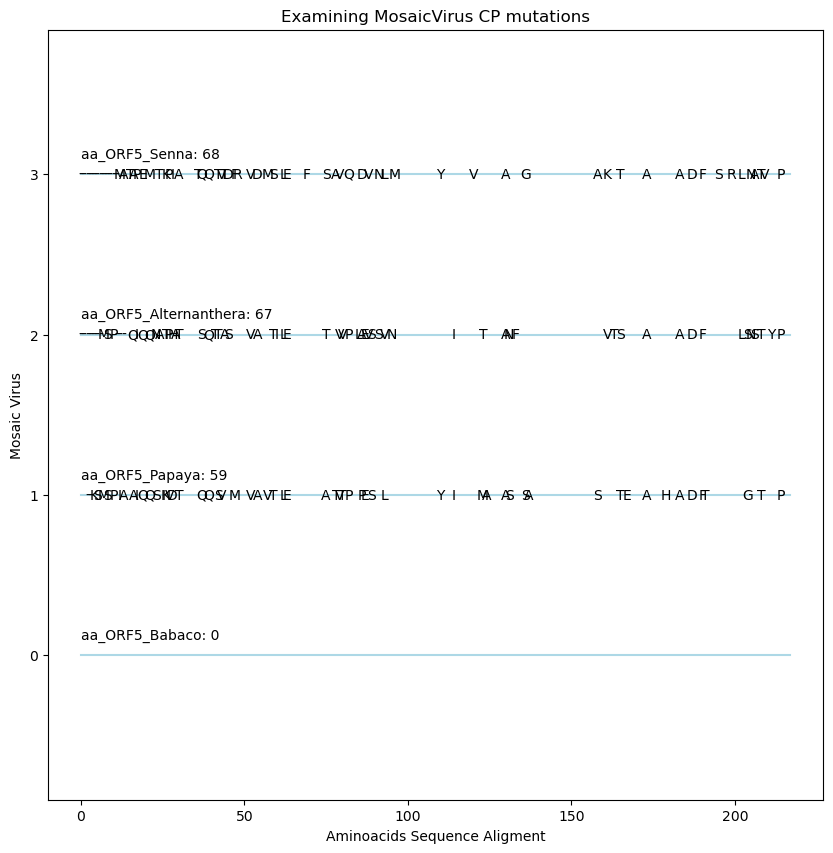

In [98]:
plt.figure(figsize =(10,10))
for y,item in enumerate(cp_aa_dic):
    plt.plot((0,len(cp_aa_dic["aa_ORF5_Babaco"])), (y,y), color = "lightblue")
    plt.text(0, y+0.10, f"{item}: {mutat_dif[item]}")
    for mutation in mutations[item]:
        pos = int(mutation[1:-1]) 
        aa_change = mutation[-1]
        plt.text(pos, y, aa_change ,va = "center", ha = "center")
    plt.xlim(-10, len(cp_aa_dic["aa_ORF5_Babaco"])+10)
    plt.ylim(-0.9,3.9)
    # Set the title and labels
    plt.title("Examining MosaicVirus CP mutations")
    plt.xlabel("Aminoacids Sequence Aligment")
    plt.ylabel("Mosaic Virus")
    # Save the plot as a PNG, JPEG and PDF files
    plt.savefig("/Users/sebastianpenaherrera/Library/CloudStorage/OneDrive-Personal/DOC 2020_2022/1.- USFQ Microsoft/8.- SEMESTRE VIII/1.1.- Ingeneria Genetica LAB/Informe 1/MosaicVirus_CP_mutations.png")
    plt.savefig("/Users/sebastianpenaherrera/Library/CloudStorage/OneDrive-Personal/DOC 2020_2022/1.- USFQ Microsoft/8.- SEMESTRE VIII/1.1.- Ingeneria Genetica LAB/Informe 1//MosaicVirus_CP_mutations.jpg")
    plt.savefig("/Users/sebastianpenaherrera/Library/CloudStorage/OneDrive-Personal/DOC 2020_2022/1.- USFQ Microsoft/8.- SEMESTRE VIII/1.1.- Ingeneria Genetica LAB/Informe 1/MosaicVirus_CP_mutations.pdf")
